In [1]:
import numpy as np
import tensorflow as tf
import random as python_random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

2024-05-08 11:15:11.873994: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-08 11:15:12.547632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def reset_random_seeds(seed_value=42):
    python_random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)

reset_random_seeds()

In [3]:
AES_Sbox = [
    # S-box array
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

def Sbox(input_byte):
    return AES_Sbox[input_byte]

def HW(s):
    return bin(s).count("1")

AES_Sbox_inv =  np.array([
    0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
    0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
    0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
    0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
    0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
    0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
    0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
    0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
    0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
    0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
    0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
    0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
    0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
    0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
    0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
])

In [4]:
# Function to generate synthetic traces
def generate_traces(num_traces, trace_length, noise_std=0.01, leakage = "ID"):
    plaintexts = np.random.randint(0, 256, size=num_traces, dtype=np.uint8)
    keys = (np.array([0x2B]* num_traces, dtype=np.uint8))
    if leakage == "ID":
      sbox_outputs = np.array([Sbox(pt ^ k) for pt, k in zip(plaintexts, keys)])
    elif leakage == "HW":
      sbox_outputs = np.array([HW(Sbox(pt ^ k)) for pt, k in zip(plaintexts, keys)])
    traces = np.random.normal(0, noise_std, size=(num_traces, trace_length))
    relevant_index = 5
    traces[np.arange(num_traces), relevant_index] = sbox_outputs
    return traces, sbox_outputs, plaintexts, keys




In [5]:
num_traces = 1000
trace_length = 20
leakage = "ID" #"HW" or "ID" (This is a string.)
X, y, _, _ = generate_traces(num_traces, trace_length, leakage = leakage)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Convert y_train and y_val to categorical
num_classes = 256  # Since you're using an 8-bit S-box, there are 256 possible output values
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes)
y_val_categorical = tf.keras.utils.to_categorical(y_val, num_classes)

In [6]:
model = tf.keras.Sequential([
    # First convolutional layer takes a 1D sequence as input
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(trace_length, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(256, activation='softmax')  # Output layer for 8-bit S-box predictions
])

/home/localuserplr/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(X_train, y_train_categorical, epochs=50, validation_data=(X_val, y_val_categorical))


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0100 - loss: 7.9971 - val_accuracy: 0.0050 - val_loss: 5.5597
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 7.2644e-04 - loss: 5.5497 - val_accuracy: 0.0000e+00 - val_loss: 5.5615
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0018 - loss: 5.5224 - val_accuracy: 0.0150 - val_loss: 5.5779
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0027 - loss: 5.4950 - val_accuracy: 0.0150 - val_loss: 5.5885
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0030 - loss: 5.4566 - val_accuracy: 0.0200 - val_loss: 5.5976
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0094 - loss: 5.4171 - val_accuracy: 0.0350 - val_loss: 5.5917
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0102 - loss: 5.3657 - val_accuracy: 0.0300 - val_loss: 5.5813
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0056 - loss: 5.3008 - val_accuracy: 0.0300 - v

In [9]:
num_attack = 1000
X_attack, y_attack, plaintexts_attack, keys_attack = generate_traces(num_attack, trace_length, leakage = leakage)

In [10]:
predictions = model.predict(X_attack)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
predicted_classes = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_classes == y_attack)

In [12]:
from tqdm import tqdm
import random

def HW(s):
    return bin(s).count("1")

def perform_attacks(nb_traces=1000, predictions=predictions, plt_attack=plaintexts_attack, correct_key=None, leakage="HW", dataset=None, nb_attacks=100, shuffle=True):
    '''.
    :param nb_traces: number_traces used to attack
    :param predictions: output of the neural network i.e. prob of each class
    :param plt_attack: plaintext from attack traces
    :param nb_attacks: number of attack experiments
    :param byte: byte in questions
    :param shuffle: true then it shuffle
    :return: mean of the rank for each experiments, log_probability of the output for all key
    '''
    all_rk_evol = np.zeros((nb_attacks, nb_traces)) #(num_attack, num_traces used)
    all_key_log_prob = np.zeros(256)
    for i in tqdm(range(nb_attacks)): #tqdm()
        if shuffle:
            l = list(zip(predictions, plt_attack)) #list of [prediction, plaintext_attack]
            random.shuffle(l) #shuffle the each other prediction
            sp, splt = list(zip(*l)) #*l = unpacking, output: shuffled predictions and shuffled plaintext.
            sp = np.array(sp)
            splt = np.array(splt)
            att_pred = sp[:nb_traces] #just use the required number of traces
            att_plt = splt[:nb_traces]

        else:
            att_pred = predictions[:nb_traces]
            att_plt = plt_attack[:nb_traces]
        rank_evol, key_log_prob = rank_compute(att_pred, att_plt,correct_key,leakage=leakage,dataset=dataset)
        all_rk_evol[i] = rank_evol
        all_key_log_prob += key_log_prob

    return np.mean(all_rk_evol, axis=0), key_log_prob, #this will be the last one key_log_prob




In [13]:
def rank_compute(prediction, att_plt, correct_key,leakage, dataset):
    '''
    :param prediction: prediction by the neural network
    :param att_plt: attack plaintext
    :return: key_log_prob which is the log probability
    '''
    hw = [bin(x).count("1") for x in range(256)]
    (nb_traces, nb_hyp) = prediction.shape

    key_log_prob = np.zeros(256)
    prediction = np.log(prediction + 1e-40)
    rank_evol = np.full(nb_traces, 255)
    for i in range(nb_traces):
        for k in range(256):
            if dataset == "AES_HD_ext":
                if leakage == 'ID':
                    key_log_prob[k] += prediction[i, AES_Sbox_inv[k ^ int(att_plt[i, 15])] ^ att_plt[i, 11] ]
                else:

                    key_log_prob[k] += prediction[i, hw[AES_Sbox_inv[k ^ int(att_plt[i, 15])] ^ att_plt[i, 11]] ]
            elif dataset == "AES_HD_ext_ID":
                if leakage == 'ID':
                    key_log_prob[k] += prediction[i, AES_Sbox_inv[k ^ int(att_plt[i, 15])]]
                else:
                    key_log_prob[k] += prediction[i, hw[AES_Sbox_inv[k ^ int(att_plt[i, 15])]]]
            else:
                if leakage == 'ID':
                    key_log_prob[k] += prediction[i,  AES_Sbox[k ^ int(att_plt[i])]]
                else:
                    key_log_prob[k] += prediction[i,  hw[ AES_Sbox[k ^ int(att_plt[i])]]]

        rank_evol[i] =  rk_key(key_log_prob, correct_key) #this will sort it.

    return rank_evol, key_log_prob

def rk_key(rank_array, key):
    key_val = rank_array[key]
    final_rank = np.float32(np.where(np.sort(rank_array)[::-1] == key_val)[0][0])
    if math.isnan(float(final_rank)) or math.isinf(float(final_rank)):
        return np.float32(256)
    else:
        return np.float32(final_rank)


In [14]:
def NTGE_fn(GE):
    NTGE = float('inf')
    for i in range(GE.shape[0] - 1, -1, -1):
        if GE[i] > 0:
            break
        elif GE[i] == 0:
            NTGE = i
    return NTGE

In [15]:
import math
nb_traces=1000
GE, key_prob = perform_attacks(nb_traces, predictions=predictions, plt_attack=plaintexts_attack, correct_key=0x2B, leakage=leakage, dataset=None, nb_attacks=100, shuffle=True) #nb_attack is the number of experiments, so 100 is enough.


def NTGE_fn(GE):
    # Start with infinity as the default
    NTGE = float('inf')
    # Iterate from the last index to the first
    for i in range(GE.shape[0] - 1, -1, -1):
        if GE[i] > 0:
            NTGE = i  # Set NTGE to the current index if condition is met
            break  # Exit the loop once condition is met
    return NTGE
NTGE = NTGE_fn(GE)
print("GE", GE)
print("NTGE", NTGE)


100%|█████████████████████████████████████████| 100/100 [00:16<00:00,  6.03it/s]

GE [3.196e+01 2.190e+01 1.338e+01 1.192e+01 6.890e+00 4.030e+00 2.470e+00
 1.900e+00 1.670e+00 9.400e-01 6.000e-01 3.700e-01 3.600e-01 4.000e-01
 2.400e-01 3.600e-01 2.100e-01 3.100e-01 2.000e-01 1.400e-01 9.000e-02
 5.000e-02 3.000e-02 1.000e-02 3.000e-02 1.000e-02 1.000e-02 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.

In [18]:
pip install Matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 91.1 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 112.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 KB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 95.8 MB/s eta 0:00:0031m128.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


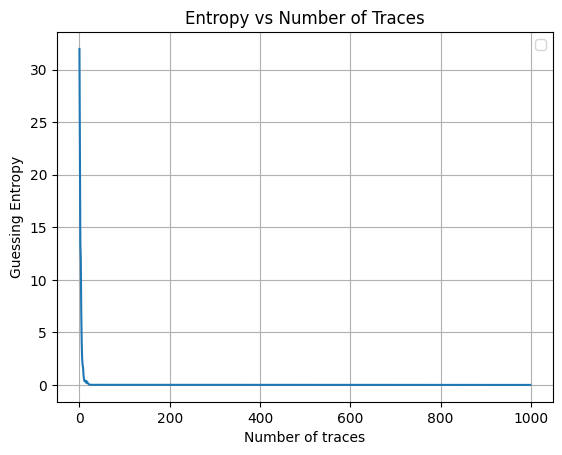

In [16]:
import matplotlib.pyplot as plt


plt.plot(GE)
plt.title('Entropy vs Number of Traces')
plt.xlabel('Number of traces')
plt.ylabel('Guessing Entropy')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
pwd

'/home/localuserplr/Documents/FYP'

In [17]:
from tensorflow.keras.models import load_model

model_path = '/home/localuserplr/Documents/FYP/myCNN_model.h5'
model.save(model_path)